In [13]:
# Clone your GitHub repo into Colab (only needs to be done once per session)
!git clone https://github.com/Nishani53/Khanal_MSc_Thesis_MSU.git
%cd Khanal_MSc_Thesis_MSU


Cloning into 'Khanal_MSc_Thesis_MSU'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 106 (delta 41), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 4.50 MiB | 12.52 MiB/s, done.
Resolving deltas: 100% (41/41), done.
/content/Khanal_MSc_Thesis_MSU/Khanal_MSc_Thesis_MSU


# Maps for Primary Milling Services in Michigan


**Prepared by Naresh Khanal**  
Forest Economics Lab, Michigan State University  
February 01, 2025  
Khanalna@msu.edu


There are four different years taken in this study, <span style="color:blue">1985</span>, <span style="color:green">1994</span>, <span style="color:red">2002</span>, and <span style="color:black">2018</span>, each representing a different decade.

Each has different types:
- <span style="color:blue">Hardwood only</span>
- <span style="color:green">Softwood only</span>
- <span style="color:red">Both hardwood and softwood</span>
- <span style="color:black">Biomass mills</span>
- <span style="color:blue">Pulp mills</span>
- <span style="color:green">Undefined mills</span>

Further, each mill is categorized with different category classes:
- <span style="color:blue">0-100 MBF</span>
- <span style="color:green">101-500</span>
- <span style="color:red">501-1000</span>
- <span style="color:black">1001-3000</span>
- <span style="color:blue">3001-5000</span>
- <span style="color:green">5001-7500</span>
- <span style="color:red">7500 above</span>
- <span style="color:black">Undefined</span>

**Download the necessary Libraries**

In [1]:
# --- Install required packages (if not already installed) ---

!pip install geopandas fiona
!pip install matplotlib-scalebar
!pip install gdown
!pip install pydrive
!pip install matplotlib-scalebar
!pip install geopandas matplotlib pandas numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.3 MB/s eta 0:00:00


**1985 Map**

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4682k    0 4682k    0     0  5423k      0 --:--:-- --:--:-- --:--:-- 5423k
Archive:  mills_data.zip
a37095b61e3198e667647f869d487b3740299273
   creating: Khanal_MSc_Thesis_MSU-main/
  inflating: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s.ipynb  
   creating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/.gitkeep  
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.cpg  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.dbf  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.prj  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.shp  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.shx  
 

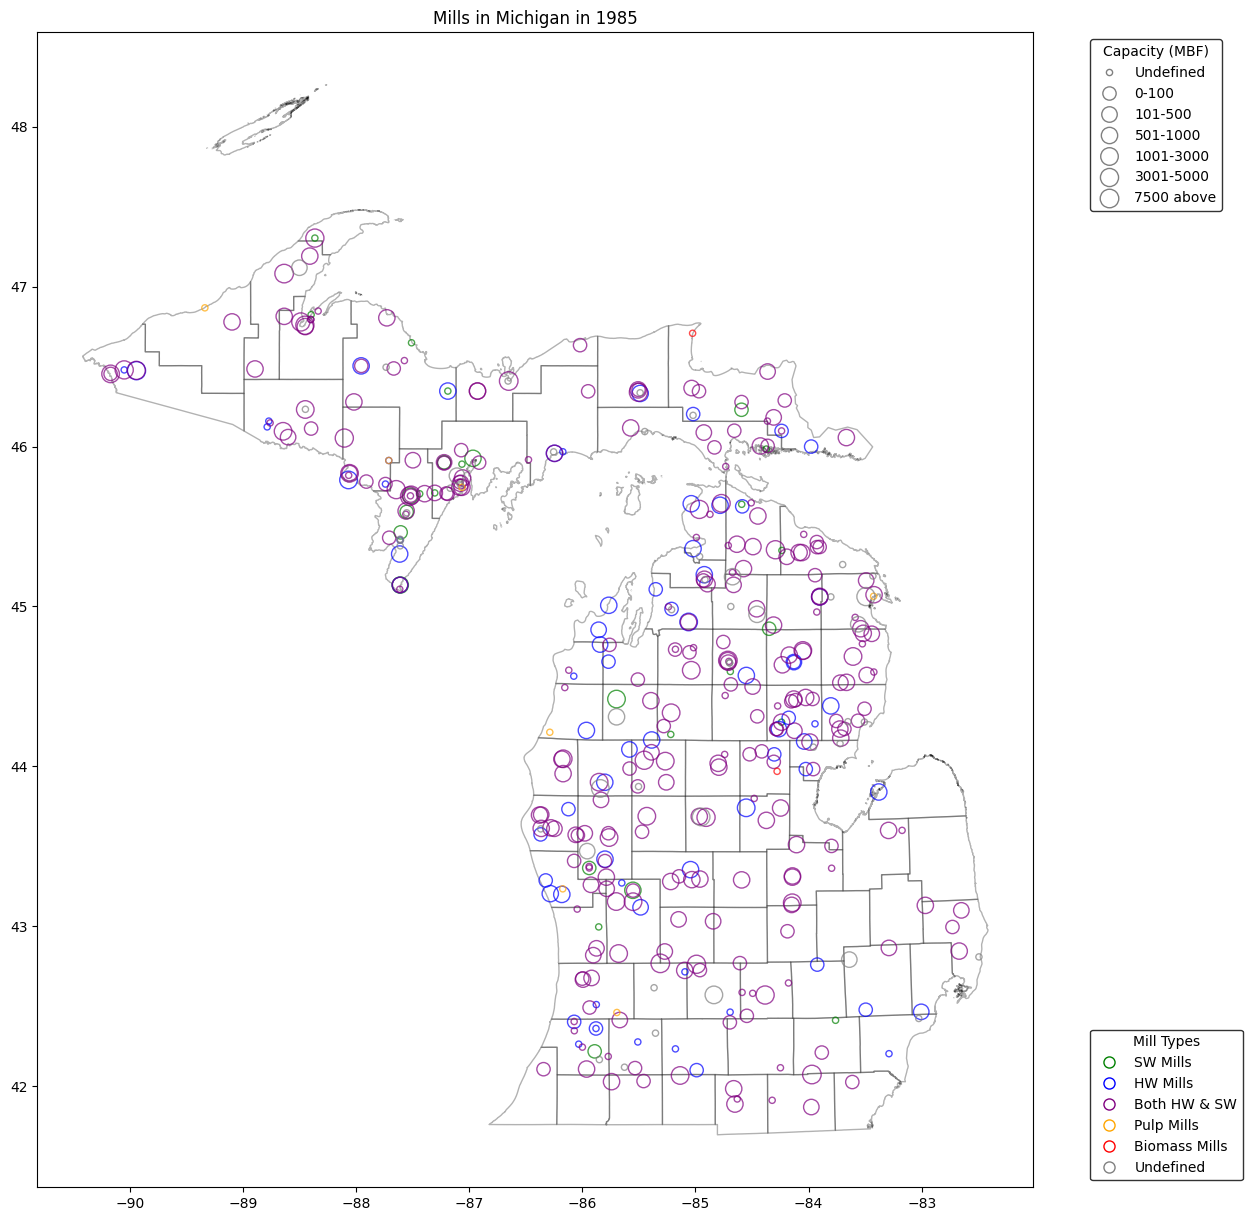

In [9]:
# --- Install dependencies (if not already) ---
!pip install geopandas matplotlib pandas numpy

# --- Download Michigan_mills folder from GitHub as ZIP ---
!curl -L -o mills_data.zip https://github.com/Nishani53/Khanal_MSc_Thesis_MSU/archive/refs/heads/main.zip
!unzip -o mills_data.zip

# --- Set path to Michigan_mills folder inside the repo ---
base_path = "Khanal_MSc_Thesis_MSU-main/Michigan_mills"

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# --- File paths ---
softwood_shp   = os.path.join(base_path, "Softwood_1985.shp")
hardwood_shp   = os.path.join(base_path, "Hardwood_1985.shp")
both_hwsw_shp  = os.path.join(base_path, "Both_HWSW_1985.shp")
pulp_shp       = os.path.join(base_path, "Pulp_1985.shp")
biomass_shp    = os.path.join(base_path, "Biomass_1985.shp")
undefined_shp  = os.path.join(base_path, "Undefined_1985.shp")
michigan_path  = os.path.join(base_path, "Michigan Counties.shp")

# --- Load shapefiles ---
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
undefined_gdf  = gpd.read_file(undefined_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# --- Define legend categories ---
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity): return 50
    if capacity <= 100: return 50
    elif capacity <= 500: return 100
    elif capacity <= 1000: return 500
    elif capacity <= 3000: return 1000
    elif capacity <= 5000: return 3000
    elif capacity <= 7500: return 5000
    else: return 7500

def scale_size(category, max_size=200):
    if category <= 50: return 20
    size = np.log(category) * 20
    return min(size, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.3)

plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# --- Padding the plot area ---
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# --- Create capacity legend ---
capacity_handles = []
for size_category in legend_labels:
    size_in_plot = scale_size(size_category)
    handle = plt.Line2D([0], [0],
                        marker='o', color='grey', markerfacecolor='none',
                        markersize=np.sqrt(size_in_plot),
                        label=legend_labels[size_category],
                        linestyle='None')
    capacity_handles.append(handle)

mill_type_colors = {
    'SW Mills': 'green', 'HW Mills': 'blue', 'Both HW & SW': 'purple',
    'Pulp Mills': 'orange', 'Biomass Mills': 'red', 'Undefined': 'grey'
}
mill_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                           markersize=8, label=label, linestyle='None')
                for label, color in mill_type_colors.items()]

# --- Add legends ---
capacity_legend = ax.legend(handles=capacity_handles, title='Capacity (MBF)',
                            loc='upper left', bbox_to_anchor=(1.05, 1),
                            frameon=True, edgecolor='black')
ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles, title='Mill Types',
          loc='lower left', bbox_to_anchor=(1.05, 0),
          frameon=True, edgecolor='black')

plt.title("Mills in Michigan in 1985")
plt.savefig('mills_in_michigan_1985.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


**1994 Map**

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4682k    0 4682k    0     0  5614k      0 --:--:-- --:--:-- --:--:-- 5614k
Archive:  repo.zip
a37095b61e3198e667647f869d487b3740299273
  inflating: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s.ipynb  
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/.gitkeep  
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.cpg  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.dbf  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.prj  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.shp  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.shx  
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1994.cpg  
  inflating: Khanal_MSc_Thesis

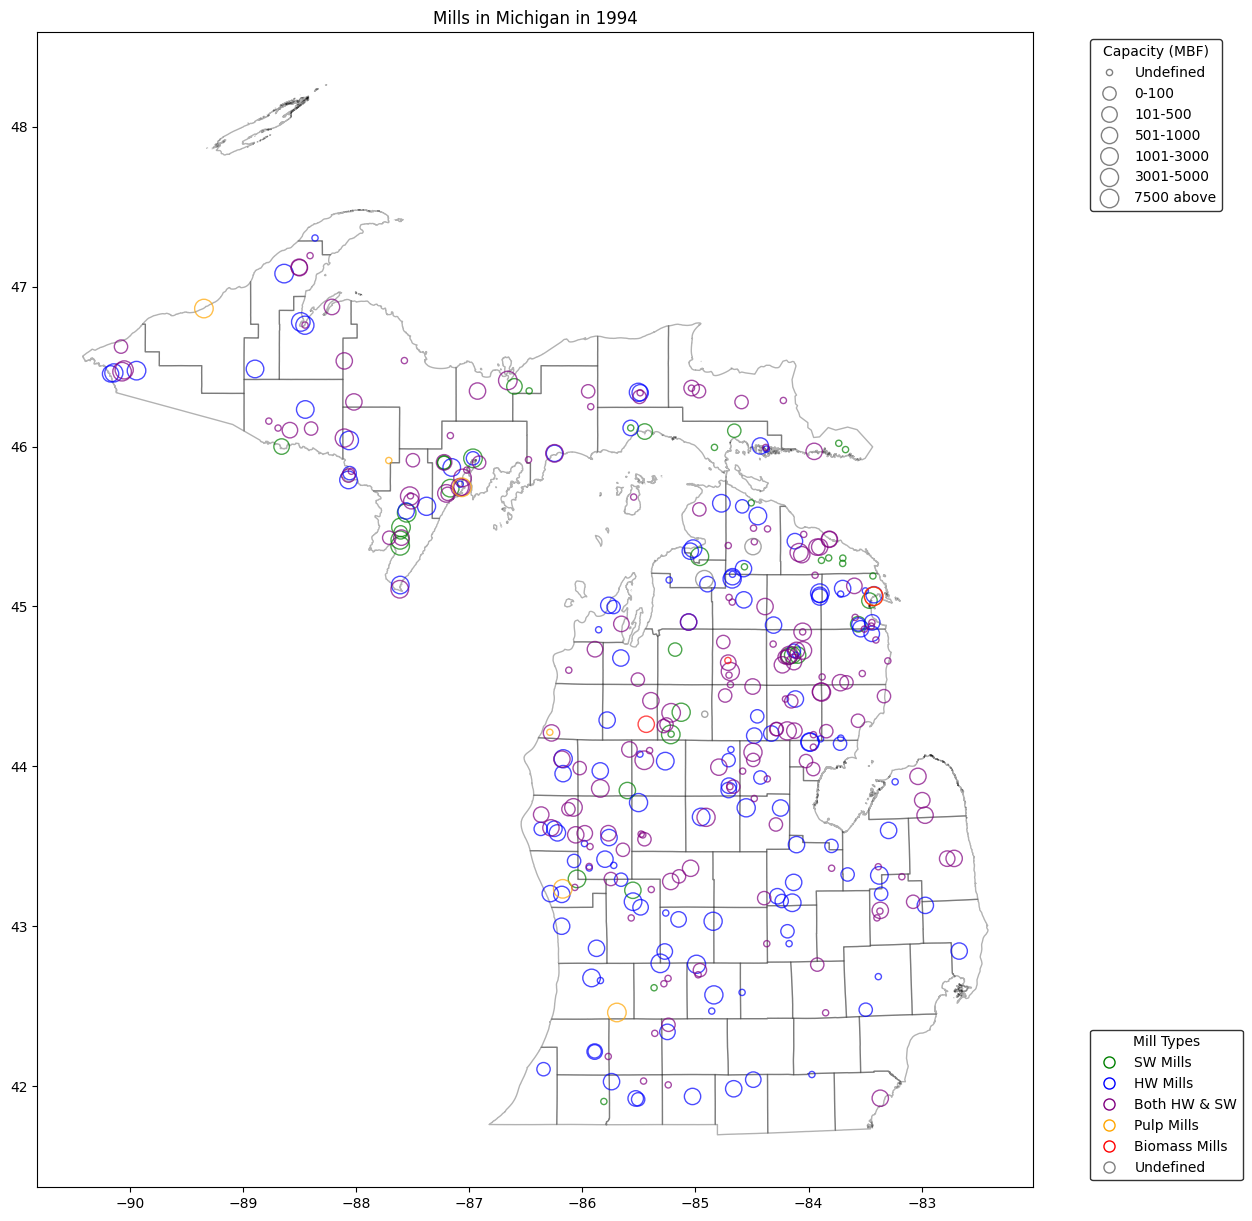

In [11]:
# --- Install required libraries ---
!pip install geopandas matplotlib pandas numpy

# --- Download and unzip your GitHub repo ---
!curl -L -o repo.zip https://github.com/Nishani53/Khanal_MSc_Thesis_MSU/archive/refs/heads/main.zip
!unzip -o repo.zip

# --- Set base path for shapefiles ---
base_path = "Khanal_MSc_Thesis_MSU-main/Michigan_mills"

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# --- File paths for 1994 shapefiles ---
softwood_shp   = os.path.join(base_path, "Softwood_1994.shp")
hardwood_shp   = os.path.join(base_path, "Hardwood_1994.shp")
both_hwsw_shp  = os.path.join(base_path, "Both_HWSW_1994.shp")
pulp_shp       = os.path.join(base_path, "Pulp_1994.shp")
biomass_shp    = os.path.join(base_path, "Biomass_1994.shp")
undefined_shp  = os.path.join(base_path, "Undefined_1994.shp")
michigan_path  = os.path.join(base_path, "Michigan Counties.shp")

# --- Load shapefiles ---
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
undefined_gdf  = gpd.read_file(undefined_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# --- Capacity legend ---
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity): return 50
    if capacity <= 100: return 50
    elif capacity <= 500: return 100
    elif capacity <= 1000: return 500
    elif capacity <= 3000: return 1000
    elif capacity <= 5000: return 3000
    elif capacity <= 7500: return 5000
    else: return 7500

def scale_size(category, max_size=200):
    if category <= 50:
        return 20
    return min(np.log(category) * 20, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# --- Plot base map and mills ---
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.3)

# --- Plot each mill type ---
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# --- Axis padding ---
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# --- Legends ---
capacity_handles = [
    plt.Line2D([0], [0], marker='o', color='grey', markerfacecolor='none',
               markersize=np.sqrt(scale_size(size)), label=label, linestyle='None')
    for size, label in legend_labels.items()
]

mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red',
    'Undefined': 'grey'
}
mill_handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
               markersize=8, label=label, linestyle='None')
    for label, color in mill_type_colors.items()
]

# --- Add legends ---
capacity_legend = ax.legend(handles=capacity_handles, title='Capacity (MBF)',
                            loc='upper left', bbox_to_anchor=(1.05, 1),
                            frameon=True, edgecolor='black')
ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles, title='Mill Types',
          loc='lower left', bbox_to_anchor=(1.05, 0),
          frameon=True, edgecolor='black')

plt.title("Mills in Michigan in 1994")
plt.savefig("mills_in_michigan_1994.png", bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


**2002 Map**

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4682k    0 4682k    0     0  5616k      0 --:--:-- --:--:-- --:--:-- 5616k
Archive:  repo.zip
c521acc2822afaa687ecf4ff12369696e5ae87c3
   creating: Khanal_MSc_Thesis_MSU-main/
  inflating: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s.ipynb  
   creating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/.gitkeep  
 extracting: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.cpg  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.dbf  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.prj  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.shp  
  inflating: Khanal_MSc_Thesis_MSU-main/Michigan_mills/Biomass_1985.shx  
 extrac

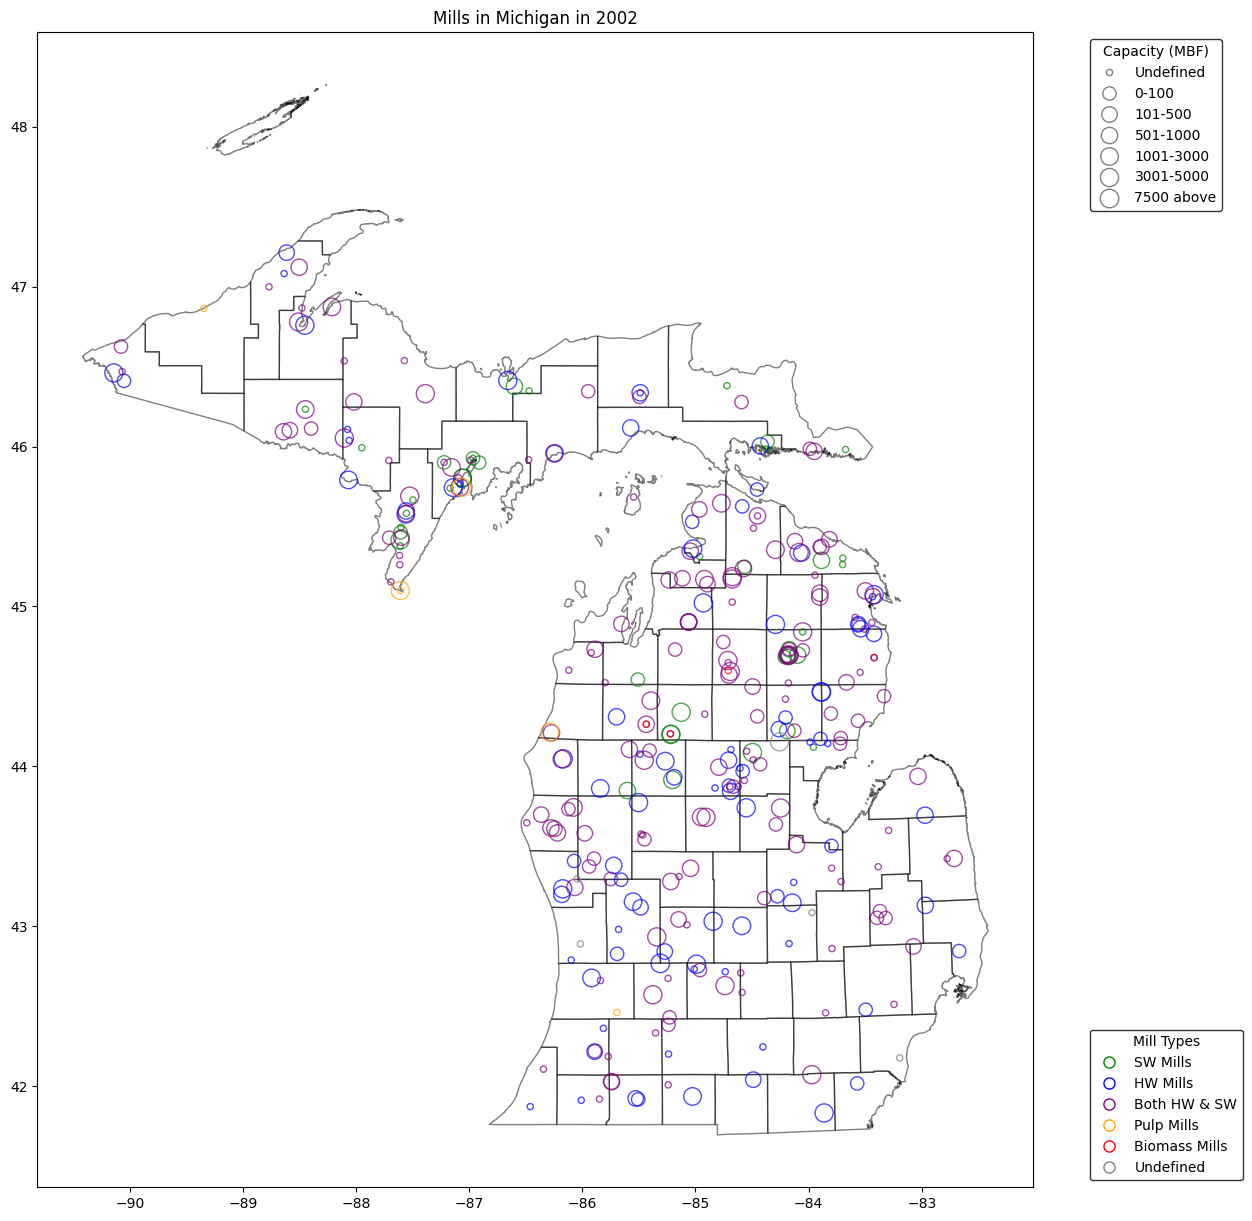

In [14]:

# --- Download the ZIP of your GitHub repo and extract it ---
!curl -L -o repo.zip https://github.com/Nishani53/Khanal_MSc_Thesis_MSU/archive/refs/heads/main.zip
!unzip -o repo.zip

# --- Set the base path for the shapefiles ---
base_path = "Khanal_MSc_Thesis_MSU-main/Michigan_mills"

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# --- File paths for 2002 ---
softwood_shp   = os.path.join(base_path, "Softwood_2002.shp")
hardwood_shp   = os.path.join(base_path, "Hardwood_2002.shp")
both_hwsw_shp  = os.path.join(base_path, "Both_HWSW_2002.shp")
pulp_shp       = os.path.join(base_path, "Pulp_2002.shp")
biomass_shp    = os.path.join(base_path, "Biomass_2002.shp")
undefined_shp  = os.path.join(base_path, "Undefined_2002.shp")
michigan_path  = os.path.join(base_path, "Michigan Counties.shp")

# --- Load shapefiles ---
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
undefined_gdf  = gpd.read_file(undefined_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# --- Define capacity legend labels ---
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity): return 50
    if capacity <= 100: return 50
    elif capacity <= 500: return 100
    elif capacity <= 1000: return 500
    elif capacity <= 3000: return 1000
    elif capacity <= 5000: return 3000
    elif capacity <= 7500: return 5000
    else: return 7500

def scale_size(category, max_size=200):
    return 20 if category <= 50 else min(np.log(category) * 20, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# --- Base plot ---
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)

# --- Plot each mill type ---
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# --- Set limits with padding ---
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# --- Create legends ---
capacity_handles = [
    plt.Line2D([0], [0], marker='o', color='grey', markerfacecolor='none',
               markersize=np.sqrt(scale_size(size)), label=label, linestyle='None')
    for size, label in legend_labels.items()
]

mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red',
    'Undefined': 'grey'
}
mill_handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
               markersize=8, label=label, linestyle='None')
    for label, color in mill_type_colors.items()
]

capacity_legend = ax.legend(handles=capacity_handles, title='Capacity (MBF)',
                            loc='upper left', bbox_to_anchor=(1.05, 1),
                            frameon=True, edgecolor='black')
ax.add_artist(capacity_legend)

ax.legend(handles=mill_handles, title='Mill Types',
          loc='lower left', bbox_to_anchor=(1.05, 0),
          frameon=True, edgecolor='black')

plt.title("Mills in Michigan in 2002")
plt.savefig("mills_in_michigan_2002.png", bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


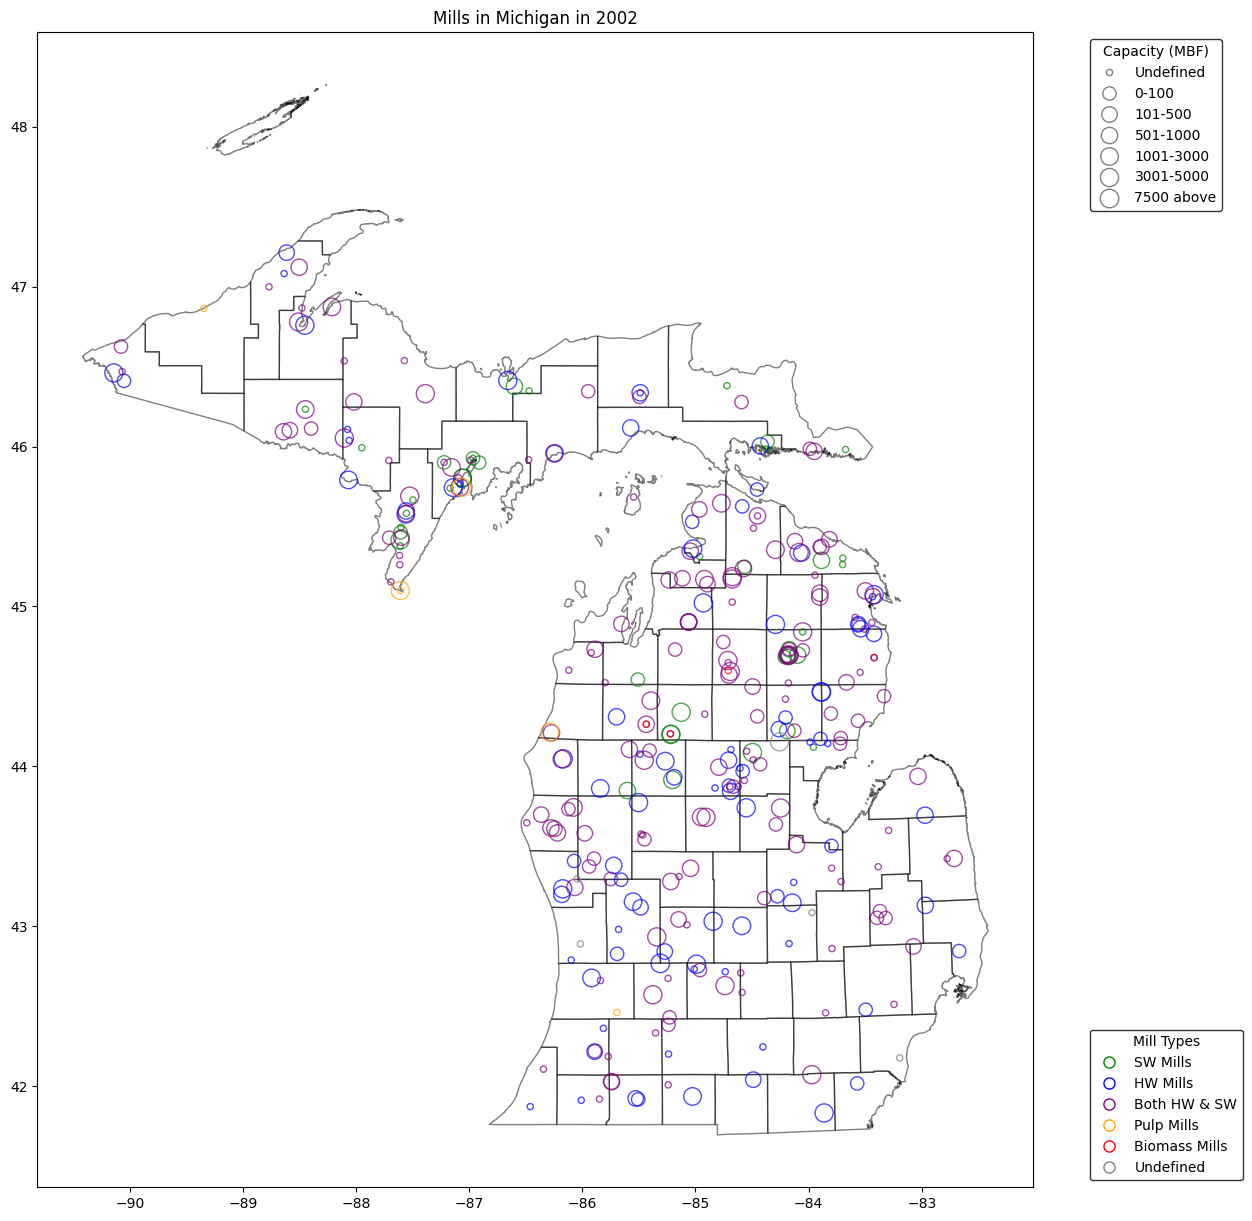

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Paths for the shapefiles (use your own paths here)
softwood_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Softwood_2002.shp"
hardwood_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Hardwood_2002.shp"
both_hwsw_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Both_HWSW_2002.shp"
pulp_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Pulp_2002.shp"
biomass_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Biomass_2002.shp"
undefined_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Undefined_2002.shp"
michigan_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Michigan Counties.shp"

# Load the shapefiles using GeoPandas
softwood_gdf = gpd.read_file(softwood_shp)
hardwood_gdf = gpd.read_file(hardwood_shp)
both_hwsw_gdf = gpd.read_file(both_hwsw_shp)
pulp_gdf = gpd.read_file(pulp_shp)
biomass_gdf = gpd.read_file(biomass_shp)
undefined_gdf = gpd.read_file(undefined_shp)
michigan_gdf = gpd.read_file(michigan_path)

# Define the categories for the Capacity_C
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

# Function to determine the size category based on the capacity
def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity):  # Check for None or NaN
        return 50  # Category for undefined capacities
    if capacity <= 100:
        return 50  # Corresponds to "0-100"
    elif capacity <= 500:
        return 100  # Corresponds to "101-500"
    elif capacity <= 1000:
        return 500  # Corresponds to "501-1000"
    elif capacity <= 3000:
        return 1000  # Corresponds to "1001-3000"
    elif capacity <= 5000:
        return 3000  # Corresponds to "3001-5000"
    elif capacity <= 7500:
        return 5000  # Corresponds to "5001-7500"
    else:
        return 7500  # Corresponds to "7500 above"

# Apply scaling to make sure the symbols fit the map properly
def scale_size(category, max_size=200):  # Increased max_size for larger symbols
    if category <= 50:
        return 20  # Increased base size for undefined category
    else:
        size = np.log(category) * 20  # Increased multiplier for larger symbols
        size = min(size, max_size)  # Cap the size at the specified max_size
        return size

# Function to plot mills with scaling for symbol size
def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7, label=color)

# Create a base plot for Michigan counties
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')  # Set facecolor to white
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)  # Set facecolor to none for hollow and adjust alpha

# Plot each mill type with a unique color
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# Adjust plot limits with padding
padding = 0.05  # 5% padding
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# Modified legend creation section
# Create capacity legend with proportional symbols using same scaling as plot
capacity_handles = []
for size_category in legend_labels:
    size_in_plot = scale_size(size_category)
    handle = plt.Line2D([0], [0],
                        marker='o',
                        color='grey',
                        markerfacecolor='none',
                        markersize=np.sqrt(size_in_plot),  # Direct size mapping
                        label=legend_labels[size_category],
                        linestyle='None')  # Remove the line
    capacity_handles.append(handle)

# Create mill type legend (keep this the same)
mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red',
    'Undefined': 'grey'
}
mill_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                           markersize=8, label=label, linestyle='None')  # Remove the line
                for label, color in mill_type_colors.items()]

# Add legends with adjusted positioning
capacity_legend = ax.legend(handles=capacity_handles,
                           title='Capacity (MBF)',
                           loc='upper left',
                           bbox_to_anchor=(1.05, 1),
                           frameon=True,
                           edgecolor='black')

ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles,
         title='Mill Types',
         loc='lower left',
         bbox_to_anchor=(1.05, 0),
         frameon=True,
         edgecolor='black')

plt.title("Mills in Michigan in 2002")

# Save the plot with padding
plt.savefig('mills_in_michigan_2002.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()

**2018 Map**

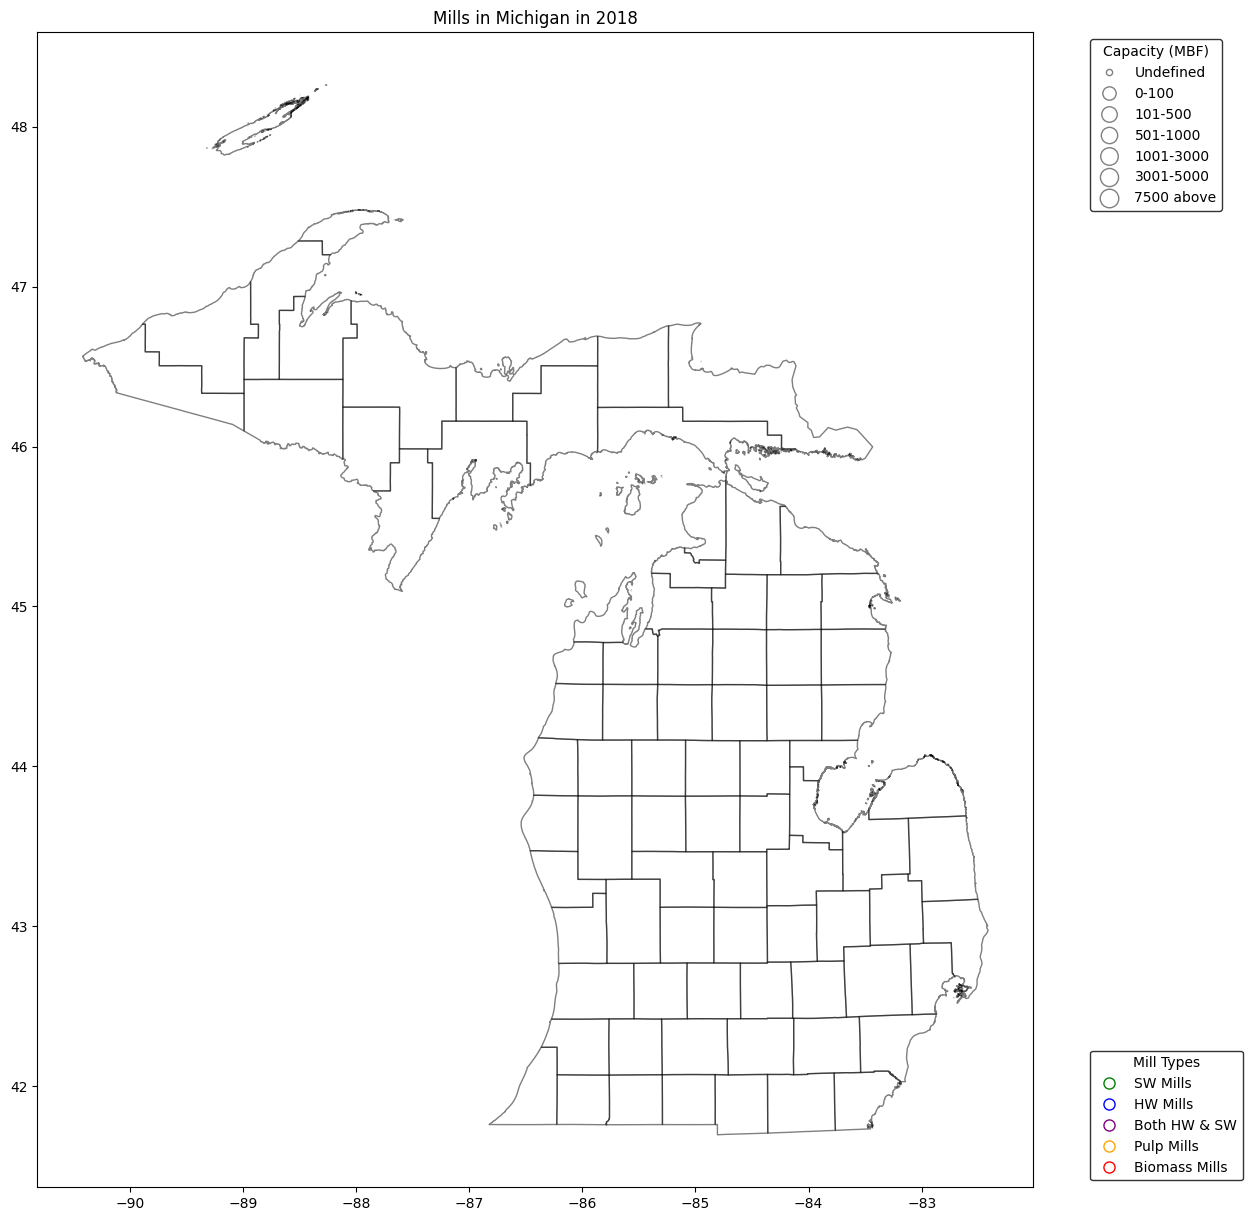

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define file paths for 2018 shapefiles
base_path = "Khanal_MSc_Thesis_MSU-main/Michigan_mills"
softwood_shp   = f"{base_path}/Softwood_2018.shp"
hardwood_shp   = f"{base_path}/Hardwood_2018.shp"
both_hwsw_shp  = f"{base_path}/Both_HWSW_2018.shp"
pulp_shp       = f"{base_path}/Pulp_2018.shp"
biomass_shp    = f"{base_path}/Biomass_2018.shp"
michigan_path  = f"{base_path}/Michigan Counties.shp"

# Load shapefiles
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# Define capacity category labels
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

# Determine capacity category
def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity):
        return 50
    if capacity <= 100:
        return 50
    elif capacity <= 500:
        return 100
    elif capacity <= 1000:
        return 500
    elif capacity <= 3000:
        return 1000
    elif capacity <= 5000:
        return 3000
    elif capacity <= 7500:
        return 5000
    else:
        return 7500

# Scale symbol size
def scale_size(category, max_size=200):
    if category <= 50:
        return 20
    else:
        size = np.log(category) * 20
        return min(size, max_size)

# Plot mills
def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# Create base map
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)

# Plot all mill types
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)

# Adjust plot limits
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# Capacity legend
capacity_handles = []
for size_category in legend_labels:
    size_in_plot = scale_size(size_category)
    handle = plt.Line2D([0], [0],
                        marker='o',
                        color='grey',
                        markerfacecolor='none',
                        markersize=np.sqrt(size_in_plot),
                        label=legend_labels[size_category],
                        linestyle='None')
    capacity_handles.append(handle)

# Mill type legend
mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red'
}
mill_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                           markersize=8, label=label, linestyle='None')
                for label, color in mill_type_colors.items()]

# Add legends
capacity_legend = ax.legend(handles=capacity_handles,
                            title='Capacity (MBF)',
                            loc='upper left',
                            bbox_to_anchor=(1.05, 1),
                            frameon=True,
                            edgecolor='black')
ax.add_artist(capacity_legend)

ax.legend(handles=mill_handles,
          title='Mill Types',
          loc='lower left',
          bbox_to_anchor=(1.05, 0),
          frameon=True,
          edgecolor='black')

plt.title("Mills in Michigan in 2018")
plt.savefig('mills_in_michigan_2018.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


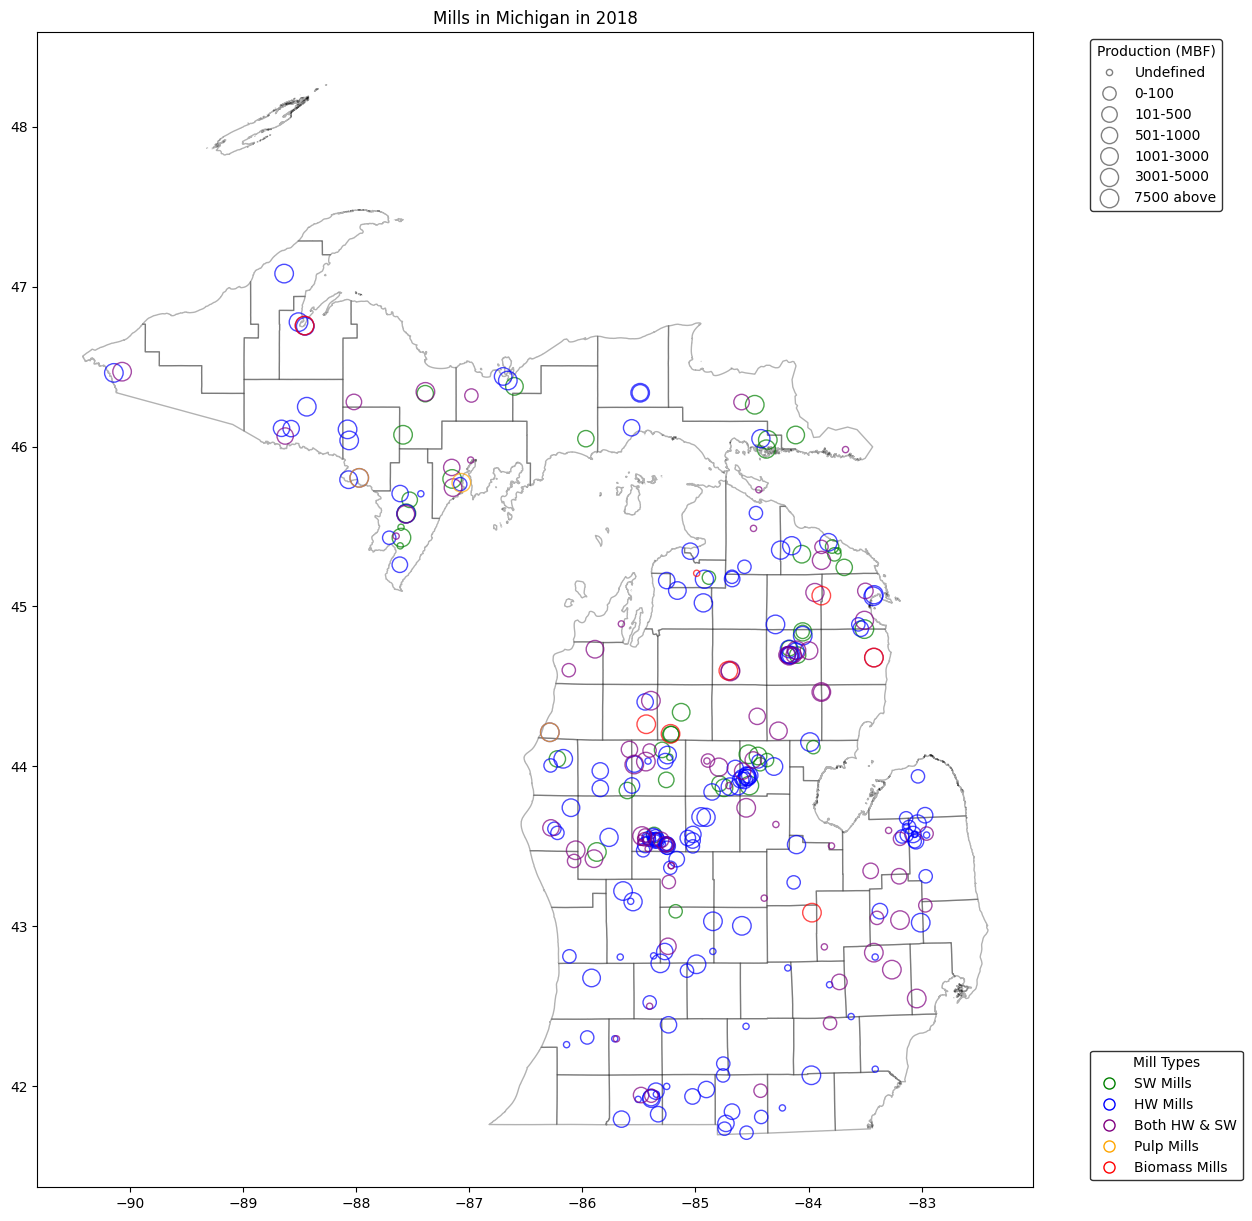

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Paths for the shapefiles (use your own paths here)
softwood_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Softwood_2018.shp"
hardwood_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Hardwood_2018.shp"
both_hwsw_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Both_HWSW_2018.shp"
pulp_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Pulp_2018.shp"
biomass_shp = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Biomass_2018.shp"
michigan_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Michigan Counties.shp"

# Load the shapefiles using GeoPandas
softwood_gdf = gpd.read_file(softwood_shp)
hardwood_gdf = gpd.read_file(hardwood_shp)
both_hwsw_gdf = gpd.read_file(both_hwsw_shp)
pulp_gdf = gpd.read_file(pulp_shp)
biomass_gdf = gpd.read_file(biomass_shp)
michigan_gdf = gpd.read_file(michigan_path)

# Convert the "Production" column to numeric values
softwood_gdf['Production'] = pd.to_numeric(softwood_gdf['Production'], errors='coerce')
hardwood_gdf['Production'] = pd.to_numeric(hardwood_gdf['Production'], errors='coerce')
both_hwsw_gdf['Production'] = pd.to_numeric(both_hwsw_gdf['Production'], errors='coerce')
pulp_gdf['Production'] = pd.to_numeric(pulp_gdf['Production'], errors='coerce')
biomass_gdf['Production'] = pd.to_numeric(biomass_gdf['Production'], errors='coerce')

# Define the categories for the Production
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

# Function to determine the size category based on the production
def get_production_category(production):
    if production is None or pd.isna(production):  # Check for None or NaN
        return 50  # Category for undefined productions
    if production <= 100:
        return 50  # Corresponds to "0-100"
    elif production <= 500:
        return 100  # Corresponds to "101-500"
    elif production <= 1000:
        return 500  # Corresponds to "501-1000"
    elif production <= 3000:
        return 1000  # Corresponds to "1001-3000"
    elif production <= 5000:
        return 3000  # Corresponds to "3001-5000"
    elif production <= 7500:
        return 5000  # Corresponds to "5001-7500"
    else:
        return 7500  # Corresponds to "7500 above"

# Apply scaling to make sure the symbols fit the map properly
def scale_size(category, max_size=200):  # Further increased max_size for larger symbols
    if category <= 50:
        return 20  # Further increased base size for undefined category
    else:
        size = np.log(category) * 20  # Further increased multiplier for larger symbols
        size = min(size, max_size)  # Cap the size at the specified max_size
        return size

# Function to plot mills with scaling for symbol size
def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Production' in gdf.columns:
        gdf['size_category'] = gdf['Production'].apply(get_production_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7, label=color)

# Create a base plot for Michigan counties
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')  # Set facecolor to white
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.3)  # Set facecolor to none for hollow and adjust alpha

# Plot each mill type with a unique color
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)

# Adjust plot limits with padding
padding = 0.05  # 5% padding
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# Modified legend creation section
# Create production legend with proportional symbols using same scaling as plot
capacity_handles = []
for size_category in legend_labels:
    size_in_plot = scale_size(size_category)
    handle = plt.Line2D([0], [0],
                        marker='o',
                        color='grey',
                        markerfacecolor='none',
                        markersize=np.sqrt(size_in_plot),  # Direct size mapping
                        label=legend_labels[size_category],
                        linestyle='None')  # Remove the line
    capacity_handles.append(handle)

# Create mill type legend (keep this the same)
mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red'
}
mill_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                           markersize=8, label=label, linestyle='None')  # Remove the line
                for label, color in mill_type_colors.items()]

# Add legends with adjusted positioning
capacity_legend = ax.legend(handles=capacity_handles,
                           title='Production (MBF)',
                           loc='upper left',
                           bbox_to_anchor=(1.05, 1),
                           frameon=True,
                           edgecolor='black')

ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles,
         title='Mill Types',
         loc='lower left',
         bbox_to_anchor=(1.05, 0),
         frameon=True,
         edgecolor='black')

plt.title("Mills in Michigan in 2018")

# Save the plot with padding
plt.savefig('mills_in_michigan_2018.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()

In [ ]:
import geopandas as gpd

# Define the folder path
folder_path = r"C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS"

# List of mill types and years
mill_types = ['Biomass', 'Both_HWSW', 'Hardwood', 'Pulp', 'Softwood', 'Undefined']
years = [1985, 1994, 2002, 2018]

# Initialize a dictionary to hold the counts for each year
yearly_counts = {year: {mill_type: 0 for mill_type in mill_types} for year in years}

# Function to read shapefile and count mills
def count_mills(year):
    for mill_type in mill_types:
        # Construct the file name for the current year and mill type
        file_name = f"{mill_type}_{year}.shp"
        file_path = f"{folder_path}\\{file_name}"

        try:
            # Read the shapefile into a GeoDataFrame
            gdf = gpd.read_file(file_path)

            # Update the count with the number of records (mills)
            yearly_counts[year][mill_type] = len(gdf)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error reading file {file_path}: {e}")

# Count mills for all years
for year in years:
    count_mills(year)

# Print the results
for year in years:
    print(f"Year {year}:")
    total_mills = sum(yearly_counts[year].values())
    for mill_type, count in yearly_counts[year].items():
        print(f"  {mill_type}: {count} mills")
    print(f"  Total mills in {year}: {total_mills}\n")


Error reading file C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Undefined_2018.shp: C:\Users\khanalna\OneDrive - Oregon State University\Naresh Personal\MSU Manuscript\Jan 2025\Forest products journal\GIS\Final_Mills_MAPS\Undefined_2018.shp: No such file or directory
Year 1985:
  Biomass: 2 mills
  Both_HWSW: 275 mills
  Hardwood: 71 mills
  Pulp: 7 mills
  Softwood: 27 mills
  Undefined: 46 mills
  Total mills in 1985: 428

Year 1994:
  Biomass: 3 mills
  Both_HWSW: 181 mills
  Hardwood: 135 mills
  Pulp: 7 mills
  Softwood: 40 mills
  Undefined: 3 mills
  Total mills in 1994: 369

Year 2002:
  Biomass: 4 mills
  Both_HWSW: 175 mills
  Hardwood: 93 mills
  Pulp: 6 mills
  Softwood: 41 mills
  Undefined: 5 mills
  Total mills in 2002: 324

Year 2018:
  Biomass: 8 mills
  Both_HWSW: 86 mills
  Hardwood: 168 mills
  Pulp: 3 mills
  Softwood: 44 mills
  Undefined: 0 mills
  Total mills in 2018: 30